# <center>Speech Emotion Recognition (SER)</center>

##### What is Speech Emotion Recognition (SER)?

* <span style="color:gray;">Speech Emotion Recognition (SER) is a technology and field of study that focuses on identifying and interpreting human emotions from speech signals. It involves analyzing various vocal attributes such as pitch, tone, intensity, rhythm, and speech rate to detect and classify emotions such as happiness, sadness, anger, fear, surprise, and neutrality.</span>

##### Why we need it?

1. <span style="color:gray;">**Improved Human-Computer Interaction:** SER enhances the way humans interact with machines by making these interactions more natural and intuitive. Emotionally aware systems can respond more appropriately to user emotions, improving user experience.</span>

2. <span style="color:gray;">**Customer Service:** In customer service, SER can help detect customer emotions during calls, enabling agents or automated systems to respond empathetically and effectively, improving customer satisfaction and loyalty.</span>

3. <span style="color:gray;">**Mental Health Assessment:** SER can aid in monitoring and diagnosing mental health conditions by identifying emotional patterns and anomalies in speech, providing valuable insights for healthcare providers.</span>

4. <span style="color:gray;">**Enhanced Communication:** For individuals with communication disorders, SER can assist in interpreting and conveying their emotional states, facilitating better understanding and interaction with others.</span>

5. <span style="color:gray;">**Personal Assistants:** Virtual assistants like Siri, Alexa, and Google Assistant can become more effective by recognizing user emotions, allowing them to provide more personalized and context-aware responses.</span>

6. <span style="color:gray;">**Security and Surveillance:** In security and surveillance, SER can help in identifying distress or potential threats by analyzing the emotional content in speech, enhancing safety and security measures.</span>

7. <span style="color:gray;">**Education:** SER can be used in educational tools to gauge student engagement and emotional states, allowing educators to adapt their teaching methods for better learning outcomes.</span>

8. <span style="color:gray;">**Entertainment:** In gaming and other entertainment applications, SER can create more immersive and responsive experiences by adjusting content based on the user’s emotional responses.</span>

##### Datasets used in this project

* <span style="color:gray;">**Crowd-sourced Emotional Mutimodal Actors Dataset (Crema-D)**</span>
* <span style="color:gray;">**Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)**</span>
* <span style="color:gray;">**Surrey Audio-Visual Expressed Emotion (Savee)**</span>
* <span style="color:gray;">**Toronto emotional speech set (Tess)**</span>

##  Impotring Libraries

In [2]:

import pandas as pd
import numpy as np
import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

import joblib

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

##  Impotring Datasets

## <center> Crema-D Dataset</center>

In [3]:
def import_cremaD(path):

    directory = '/path/to/directory/'
    folders = [f for f in os.listdir(path) ]
    emo = []
    fullName = []
    for folder in folders:
        files=os.listdir(path+folder)
        for file in files:
            fullName.append(path+folder+"/"+file)
            step = file.split('.')[0]
            emo.append(cremaD_convert(step))

    data={"path":fullName,"emotion":emo}
    df=pd.DataFrame(data)
    return df

## <center> RAVDESS Dataset </center>

Here is the filename identifiers as per the official RAVDESS website:

* <span style="color:gray;"> Modality (01 = full-AV, 02 = video-only, 03 = audio-only).</span>
* <span style="color:gray;">Vocal channel (01 = speech, 02 = song).</span>
* <span style="color:gray;">Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).</span>
* <span style="color:gray;">Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.</span>
* <span style="color:gray;">Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").</span>
* <span style="color:gray;">Repetition (01 = 1st repetition, 02 = 2nd repetition).</span>
* <span style="color:gray;">Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).</span>

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

* <span style="color:gray;">Video-only (02)</span>
* <span style="color:gray;">Speech (01)</span>
* <span style="color:gray;">Fearful (06)</span>
* <span style="color:gray;">Normal intensity (01)</span>
* <span style="color:gray;">Statement "dogs" (02)</span>
* <span style="color:gray;">1st Repetition (01)</span>
* <span style="color:gray;">12th Actor (12) - Female (as the actor ID number is even)</span>

In [4]:
def import_ravdess(path):

    directory = '/path/to/directory'
    exclude_folder = 'audio_speech_actors_01-24'
    folders = [f for f in os.listdir(path+exclude_folder) ]
    emo = []
    fullName = []
    for folder in folders:
        files=os.listdir(path+folder)
        for file in files:
            fullName.append(path+folder+"/"+file)
            step = file.split('.')[0]
            emotion=int(step.split('-')[2])
            if emotion == 2:
                emotion = 1
            emo.append(emotion)
    data={"path":fullName,"emotion":emo}
    df=pd.DataFrame(data)
    return df

## <center>SAVEE Dataset</center>

In [5]:
def import_savee(path):

    directory = '/path/to/directory/'
    exclude_folder = 'audiodata/AudioData'
    folders = [f for f in os.listdir(path+exclude_folder) ]
    emo = []
    fullName = []
    for folder in folders:
        if path+'AudioData/'+folder == '/kaggle/input/savee-database/AudioData/Info.txt':
            continue
        files=os.listdir(path+'AudioData/'+folder)
        for file in files:
            fullName.append(path+'AudioData/'+folder+"/"+file)
            step = file.split('.')[0]
            emo.append(savee_convert(step))


    data={"path":fullName,"emotion":emo}
    df=pd.DataFrame(data)
    return df

## <center> TESS Dataset</center>

In [6]:
def import_tess(path):

    directory = '/path/to/directory/'
    folders = [f for f in os.listdir(path) ]
    emo = []
    fullName = []
    for folder in folders:
        files=os.listdir(path+folder)
        for file in files:
            fullName.append(path+folder+"/"+file)
            step = file.split('.')[0]
            emo.append(tess_convert(step))

    data={"path":fullName,"emotion":emo}
    df=pd.DataFrame(data)
    return df

##  Data preparation 
1. <span style="color:gray;">Convert a given emotion name to numeric value based on predefined mappings in RAVDESS</span>

2. <span style="color:gray;">Define the paths to the datasets</span>

3. <span style="color:gray;">Import each dataset into a dataframe by their paths</span>

4. <span style="color:gray;">Concatenate the dataframes into a single dataframe</span>

5. <span style="color:gray;">Shuffle the combined dataframe</span>

6. <span style="color:gray;">Create a copy of the combined dataframe with emotion names for data visualization</span>

In [7]:
def cremaD_convert(name):
    ch = name.split('_')[2]
    if ch == 'ANG':
        return 5
    elif ch == 'DIS':
        return 7
    elif ch == 'FEA':
        return 6
    elif ch == 'HAP':
        return 3
    elif ch == 'NEU':
        return 1
    elif ch == 'SAD':
        return 4

In [8]:
def savee_convert(name):
    ch = name[0]


    if ch == 's':
        ch+=name[1]


    if ch == 'a':
        return 5
    elif ch == 'd':
        return 7
    elif ch == 'f':
        return 6
    elif ch == 'h':
        return 3
    elif ch == 'n':
        return 1
    elif ch == 'sa':
        return 4
    elif ch == 'su':
        return 8

In [9]:
def tess_convert(name):
    ch = name.split('_')[2]
    if ch == 'angry':
        return 5
    elif ch == 'disgust':
        return 7
    elif ch == 'fear':
        return 6
    elif ch == 'happy':
        return 3
    elif ch == 'neutral':
        return 1
    elif ch == 'sad':
        return 4
    elif ch == 'ps':
        return 8

In [10]:
# Paths of the datasets
path="/kaggle/input/ravdess-emotional-speech-audio/"
path2='/kaggle/input/savee-database/'
path3='/kaggle/input/cremad/'
path4='/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/'

# Import each dataset into a dataframe
df=import_ravdess(path)
df2 =import_savee(path2)
df3 = import_cremaD(path3)
df4 = import_tess(path4)

# Concatenate all dataframes into a single dataframe
df=pd.concat([df,df2,df3,df4])

# Shuffle the combined dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [23]:
# Create a copy of the combined dataframe with emotion names for data visualization
df_vis = df
df_vis.emotion = df.emotion.replace({1:'Neutral', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust', 8:'Surprise'})

In [27]:
df_vis.head(20)

,path,emotion
0,/kaggle/input/cremad/AudioWAV/1022_ITS_HAP_XX.wav,happy
1,/kaggle/input/toronto-emotional-speech-set-tes...,sad
2,/kaggle/input/cremad/AudioWAV/1061_ITS_SAD_XX.wav,sad
3,/kaggle/input/cremad/AudioWAV/1021_IEO_HAP_HI.wav,happy
4,/kaggle/input/cremad/AudioWAV/1077_ITS_NEU_XX.wav,neutral
5,/kaggle/input/cremad/AudioWAV/1057_TAI_ANG_XX.wav,angry
6,/kaggle/input/cremad/AudioWAV/1006_IEO_SAD_LO.wav,sad
7,/kaggle/input/cremad/AudioWAV/1071_TAI_SAD_XX.wav,sad
8,/kaggle/input/cremad/AudioWAV/1046_ITS_HAP_XX.wav,happy
9,/kaggle/input/toronto-emotional-speech-set-tes...,disgust


## Data visualization and Exploration

<span style="color:gray;font-size:18px;">Count of each emotion in our combined dataframe</span>

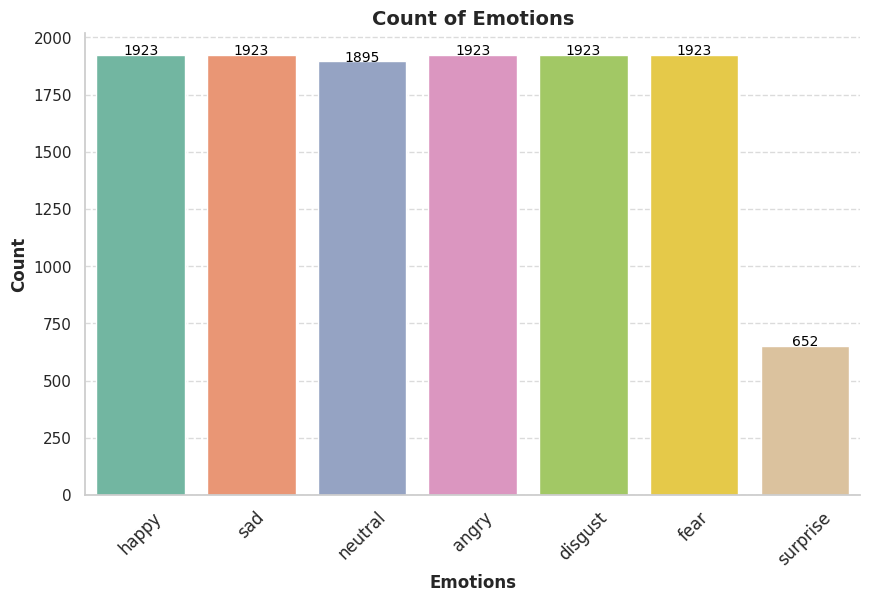

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=14, fontweight='bold')

palette = sns.color_palette("Set2")
count = sns.countplot(x='emotion', data=df_vis, palette=palette)

plt.ylabel('Count', size=12, fontweight='bold')
plt.xlabel('Emotions', size=12, fontweight='bold')

plt.xticks(rotation=45, size=12)

sns.despine(top=True, right=True)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in count.patches:
    count.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=10, color='black')


plt.show()

<span style="color:gray;font-size:18px;">Waveplots and Spectograms for audio signals</span>
* <span style="color:gray;font-size:14px;">Waveplots let us know the loudness of the audio at a given time. </span>
* <span style="color:gray;font-size:14px;">A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals. </span>


In [49]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

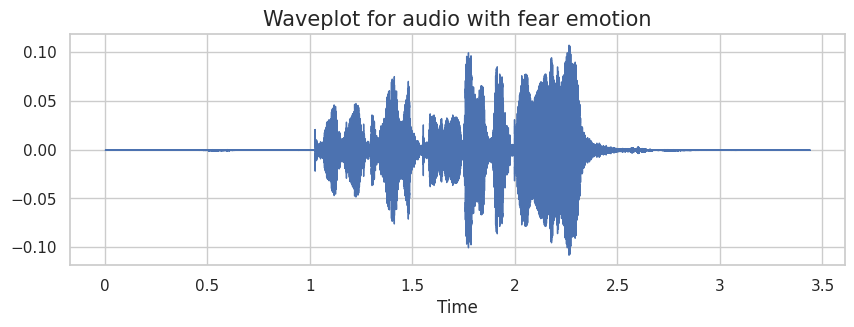

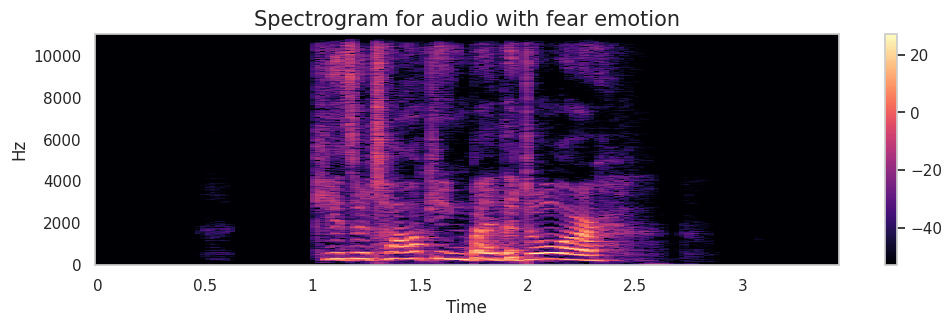

In [50]:
emotion='fear'
path = np.array(df_vis.path[df_vis.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

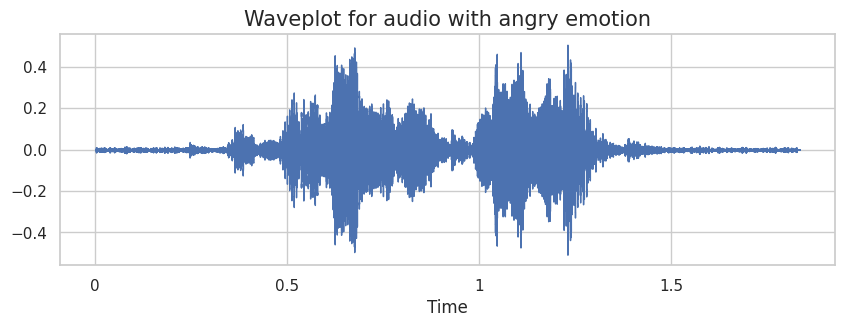

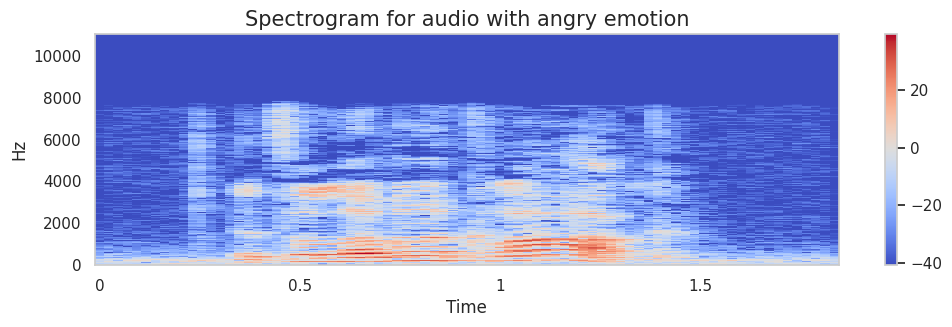

In [54]:
emotion='angry'
path = np.array(df_vis.path[df_vis.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

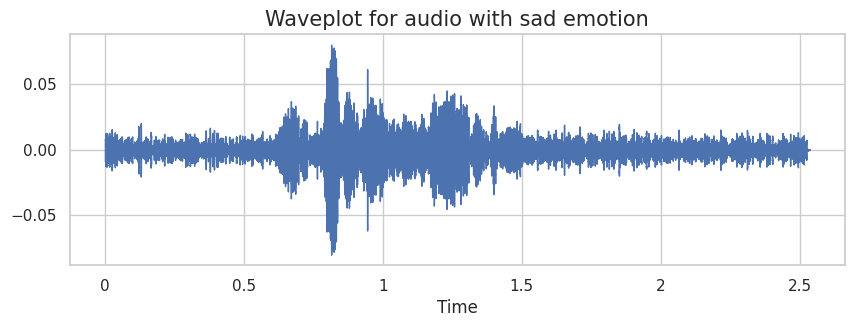

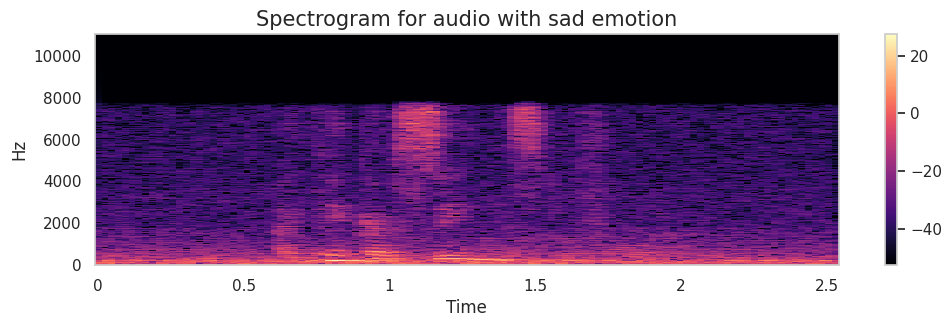

In [55]:
emotion='sad'
path = np.array(df_vis.path[df_vis.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

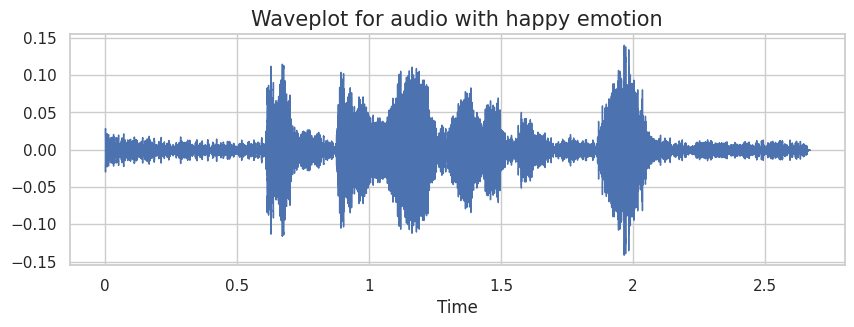

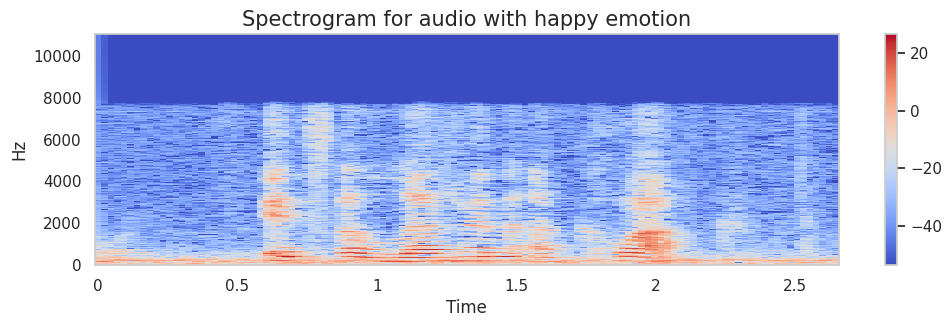

In [56]:
emotion='happy'
path = np.array(df_vis.path[df_vis.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation 

* <span style="color:gray;">Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.</span>
* <span style="color:gray;">To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.</span>
* <span style="color:gray;">The objective is to make our model invariant to those perturbations and enhace its ability to generalize.</span>

<span style="color:gray;">Let's check which augmentation techniques works better for our dataset.</span>

In [59]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, r):
    r = librosa.get_duration(y=data,sr=r)
    r = 7/r
    return librosa.effects.time_stretch(data, rate = r)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, ns = 13):
    return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = ns)

# taking any example and checking for techniques.
path = np.array(df.path)[1]
data, sample_rate = librosa.load(path)

1. Simple Data

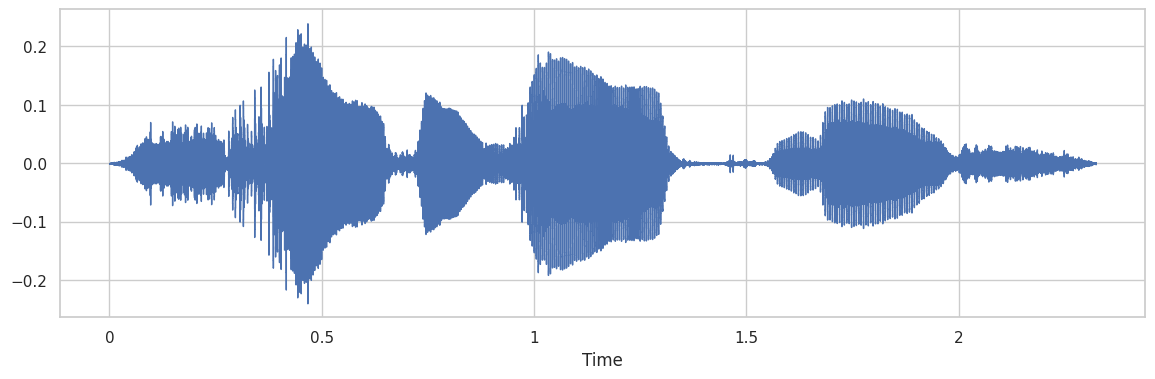

In [61]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

2. Noise

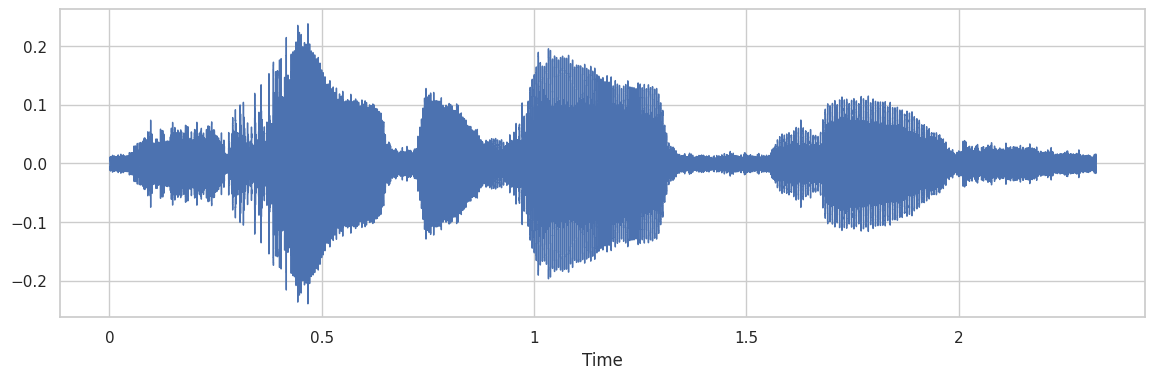

In [62]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

3. Stretching

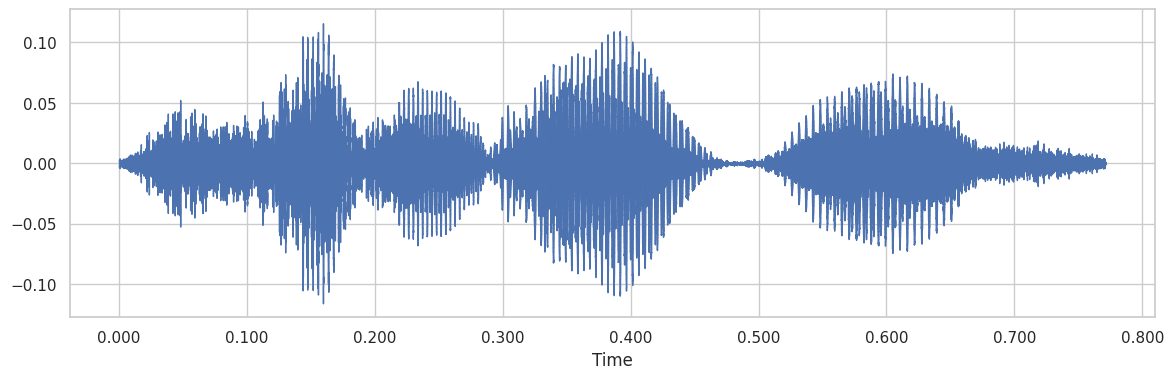

In [65]:
x = stretch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

4. Shifting

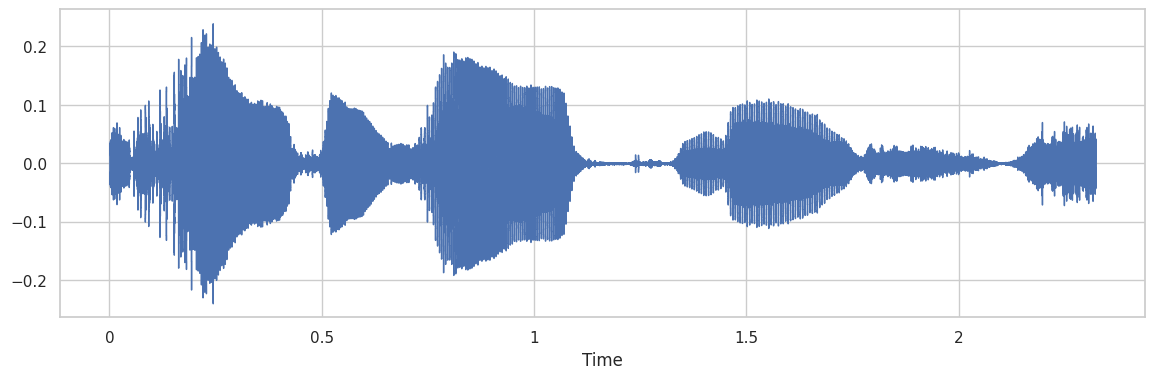

In [67]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

5. Pitch

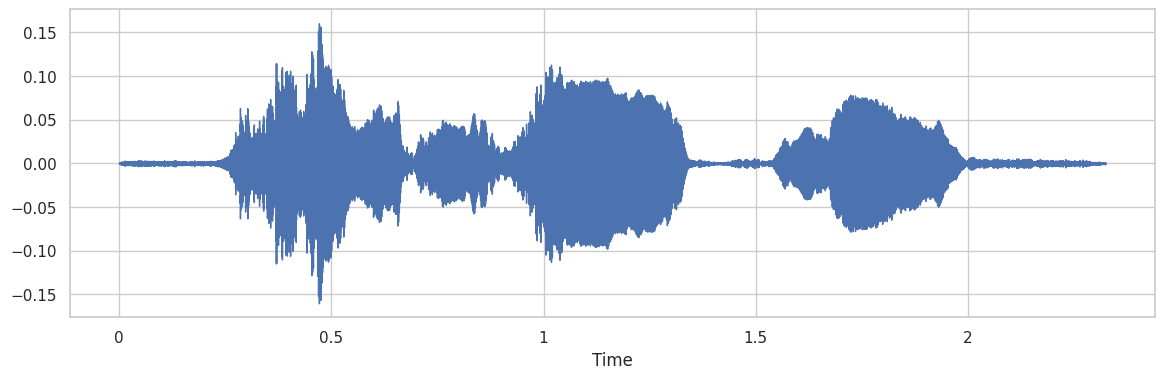

In [69]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<span style="color:gray;font-size:18px;">From the above data augmentation techniques, we work with noise and some pitching</span>

## Feature Extraction
* <span style="color:gray;"> Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.</span>

<span style="color:gray;"> We are extracting 3 features: </span>
* <span style="color:gray;"> Zero Crossing Rate (ZCR): The rate of sign-changes of the signal during the duration of a particular frame.</span>
* <span style="color:gray;"> Root Mean Square (RMS).</span>
* <span style="color:gray;"> Mel Frequency Cepstral Coefficients (MFCC) form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.</span>

In [11]:
def extract_feature(data, sample_rate):
    frame_length=1024
    hop_length=512
    results = np.array([])

    #Zero Crossing Rate (Horizontal Crossing)
    zcr = librosa.feature.zero_crossing_rate(y = data, frame_length=frame_length, hop_length=hop_length)
    zcr = np.squeeze(zcr)
    zcr = librosa.util.fix_length(zcr, size=108, axis=0)

    #RMS
    rms = np.squeeze(librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length))
    rms = librosa.util.fix_length(rms, size=108, axis=0)

    #MFCC
    mfcc = librosa.feature.mfcc(y=data, sr=22050,n_fft=frame_length, hop_length=hop_length, n_mfcc=40)
    mfcc = np.ravel(mfcc.T)
    mfcc = librosa.util.fix_length(mfcc, size=4320, axis=0)

    results = np.hstack((results,zcr,rms,mfcc))
    return results

def get_feature(path2):
    data, sample_rate = librosa.load(path2, duration = 2.5, offset = 0.6)

#Simple data
    res1 = extract_feature(data, sample_rate)

#data with noise
    noise_data = noise(data)
    res2 = extract_feature(noise_data,sample_rate)

#data with noise
    pitch_data = pitch(data, sample_rate, ns = 13)
    res3 = extract_feature(pitch_data, sample_rate)

#pitched data with noise
    pitched_noisy_data = pitch(data, sample_rate, ns = 13)
    pitched_noisy_data = noise(pitched_noisy_data)
    res4 = extract_feature(pitched_noisy_data, sample_rate)

    return res1,res2,res3,res4

<span style="color:gray;font-size:18px;">Get the 3 features of the data and save them into a dataframe</span>

In [12]:
# X_r1,X_r2,X_r3,X_r4,y_1,y_2,y_3,y_4 = [],[],[],[],[],[],[],[]
# for i in range(len(df)):
#     f1,f2,f3,f4=get_feature(df.iloc[i].path)
#     X_r1.append(f1)
#     X_r2.append(f2)
#     X_r3.append(f3)
#     X_r4.append(f4)
#     y_1.append(df.iloc[i].emotion)
#     y_2.append(df.iloc[i].emotion)
#     y_3.append(df.iloc[i].emotion)
#     y_4.append(df.iloc[i].emotion)


In [13]:
# df1=np.array(X_r1)
# df1=np.vstack((df1,X_r2))
# df1=np.vstack((df1,X_r3))
# df1=np.vstack((df1,X_r4))
# df1=pd.DataFrame(df1)
# y = y_1 + y_2 + y_3 + y_4
# y = np.array(y)
# X = df1
# df1.shape

In [14]:
# Y_r = list(y)
# X_r1_path = os.path.join('/kaggle/working', 'X_r1.pkl')
# X_r2_path = os.path.join('/kaggle/working', 'X_r2.pkl')
# X_r3_path = os.path.join('/kaggle/working', 'X_r3.pkl')
# X_r4_path = os.path.join('/kaggle/working', 'X_r4.pkl')
# Y_r_path = os.path.join('/kaggle/working', 'Y_r.pkl')

# import pickle

# with open(X_r1_path, 'wb') as f:
#     pickle.dump(X_r1, f)

# with open(X_r2_path, 'wb') as f:
#     pickle.dump(X_r2, f)

# with open(X_r3_path, 'wb') as f:
#     pickle.dump(X_r3, f)

# with open(X_r4_path, 'wb') as f:
#     pickle.dump(X_r4, f)

# with open(Y_r_path, 'wb') as f:
#     pickle.dump(Y_r, f)

# print(f"X_r1 and X_r2 saved to: {X_r1_path}, {X_r2_path}")

<span style="color:gray;font-size:18px;"> We already got features and saved them, so we just want to load them</span>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the zip file
filename= "/content/drive/MyDrive/archive (5).zip"

# Step 2: Decompress the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content')

    # Verify the files are extracted
extracted_files = os.listdir('/content')
print('Extracted files:', extracted_files)

Extracted files: ['.config', 'X_r2 (1).pkl', 'X_r1 (1).pkl', 'Y_r (1).pkl', 'saved_models', 'X_r3 (1).pkl', 'scaler (1).pkl', 'X_r4 (1).pkl', 'drive', 'scaler.pkl', 'sample_data']


In [17]:
import pickle
X_r1_path=r'/content/X_r1 (1).pkl'
X_r2_path=r'/content/X_r2 (1).pkl'
X_r3_path=r'/content/X_r3 (1).pkl'
X_r4_path=r'/content/X_r4 (1).pkl'
Y_r_path=r'/content/Y_r (1).pkl'
scaler_path=r'/content/scaler (1).pkl'

try:
  with open(X_r1_path, 'rb') as f:
      X_r1 = pickle.load(f)

  with open(X_r2_path, 'rb') as f:
      X_r2 = pickle.load(f)

  with open(X_r3_path, 'rb') as f:
      X_r3 = pickle.load(f)

  with open(X_r4_path, 'rb') as f:
      X_r4 = pickle.load(f)

  with open(Y_r_path, 'rb') as f:
      Y_r = pickle.load(f)

  with open(scaler_path, 'rb') as f:
      scaler = joblib.load(f)

  print("X_r1, X_r2, X_r3, X_r4 and Y_r loaded successfully!")
except FileNotFoundError:
  print("Saved data not found. Please ensure you saved X_r1, X_r2, X_r3, X_r4 and Y_r in the working directory.")
df1=pd.DataFrame(np.concatenate((X_r1,X_r2,X_r3,X_r4),axis=0))
y = Y_r
y = np.array(y)
X = df1

X_r1, X_r2, X_r3, X_r4 and Y_r loaded successfully!


In [18]:
df1.shape

(48648, 4536)

## Data Preparation for modelling

* <span style="color:gray;"> Split data for training and testing</span>
* <span style="color:gray;"> Normalize the data and save into offline file</span>
* <span style="color:gray;"> Encode emotion labels into numbers</span>

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [22]:
from sklearn.preprocessing import StandardScaler
# X_train.columns=X_train.columns.astype(str)
# X_test.columns=X_test.columns.astype(str)


#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [23]:
#Label Encoding
import keras.utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

#Encode emotion labels into numbers
y_train_lb = keras.utils.to_categorical(lb.fit_transform(y_train))
y_test_lb = keras.utils.to_categorical(lb.fit_transform(y_test))

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')

X_train shape: (38918, 4536)

y_train shape: (38918, 7)

X_test shape: (9730, 4536)

y_test shape: (9730, 7)


## Modelling

<span style="color:gray;">CNN Model</span>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dropout, Dense, MaxPool1D, AvgPool1D
import tensorflow as tf
# detect and init the TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    raise BaseException('ERROR: Not connected to a TPU runtime; please check your runtime type.')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)



# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
# Build sequential CNN
  CNN_model = tf.keras.models.Sequential([
                        Conv1D(512, 5, padding='same', input_shape=(4536, 1), activation='relu'),
                        BatchNormalization(),
                        AvgPool1D(padding='same',strides=3,pool_size=5),
                        Dropout(0.6),

                        Conv1D(64, 5, padding='same', activation='relu'),
                        BatchNormalization(),

                        Conv1D(32, 5, padding='same', activation='relu'),
                        BatchNormalization(),
                        Dropout(0.3),

                        Flatten(),
                        Dense(256,activation='relu'),
                        Dropout(0.37),
                        Dense(128,activation='relu'),
                        Dense(7,activation='softmax')

])
  CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

Running on TPU  


In [21]:
X_train.shape

(38918, 4536)

In [24]:
x_traincnn = np.expand_dims(X_train_scalled, axis=2)
x_testcnn = np.expand_dims(X_test_scalled, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(38918, 4536, 1)

(9730, 4536, 1)


In [25]:
CNN_model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv1d (Conv1D)             (None, 4536, 512)         3072      

                                                                 

 batch_normalization (Batch  (None, 4536, 512)         2048      

 Normalization)                                                  

                                                                 

 average_pooling1d (Average  (None, 1512, 512)         0         

 Pooling1D)                                                      

                                                                 

 dropout (Dropout)           (None, 1512, 512)         0         

                                                                 

 conv1d_1 (Conv1D)           (None, 1512, 256)         655616    

                                                                 

 batch_normalization_1 (Bat  (None, 1512

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
check_loss = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn-1.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
check_acc = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn-2.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5)

#Model fit
cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
              batch_size = 64,
              epochs = 100,
              verbose = 1,
              validation_data = (x_testcnn, y_test_lb),
              callbacks=[check_loss,check_acc,reduce_lr])

Epoch 1/100

609/609 [==============================] - ETA: 0s - loss: 1.5170 - accuracy: 0.4243

Epoch 1: val_loss improved from inf to 1.19056, saving model to saved_models/weights.best.basic_cnn-1.keras



Epoch 1: val_accuracy improved from -inf to 0.51778, saving model to saved_models/weights.best.basic_cnn-2.keras

609/609 [==============================] - 44s 52ms/step - loss: 1.5170 - accuracy: 0.4243 - val_loss: 1.1906 - val_accuracy: 0.5178 - lr: 0.0010

Epoch 2/100

608/609 [============================>.] - ETA: 0s - loss: 1.2380 - accuracy: 0.5070

Epoch 2: val_loss improved from 1.19056 to 1.10727, saving model to saved_models/weights.best.basic_cnn-1.keras



Epoch 2: val_accuracy improved from 0.51778 to 0.56783, saving model to saved_models/weights.best.basic_cnn-2.keras

609/609 [==============================] - 19s 32ms/step - loss: 1.2380 - accuracy: 0.5070 - val_loss: 1.1073 - val_accuracy: 0.5678 - lr: 0.0010

Epoch 3/100

608/609 [============================>

In [ ]:
from google.colab import files

# Specify the path to your output file
output_file_path_1 = '/content/saved_models/weights.best.basic_cnn-1.keras'
output_file_path_2 = '/content/saved_models/weights.best.basic_cnn-2.keras'
files.download(output_file_path_1)
files.download(output_file_path_2)

## Accuracy 

In [ ]:
# Calculate pre-training accuracy
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

In [ ]:
# Evaluating the model on the training and testing set
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

In [ ]:
CNN_model.save('my_model.h5')
files.download('my_model.h5')

In [ ]:
CNN_model.load_weights('my_model.h5')
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
val_loss, val_acc = CNN_model.evaluate(x_testcnn, y_test_lb)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#fitting the DT
DT_model_one = DecisionTreeClassifier()
DT_model_one.fit(X_train, y_train_lb)

#Getting the score
print(f"The classification accuracy is: {DT_model_one.score(X_train, y_train_lb)}")
print(f"The classification accuracy is: {DT_model_one.score(X_test, y_test_lb)}")

In [ ]:
# import librosa
# import joblib
# import numpy as np
# from tensorflow.keras.models import load_model
# from sklearn.preprocessing import StandardScaler, LabelEncoder

# # Function to preprocess new audio file
# def preprocess_audio(file_path):
#     data, sample_rate = librosa.load(file_path, duration=2.5, offset=0.6)
#     features = extract_feature(data, sample_rate)
#     features_scaled = scaler.transform([features])
#     features_scaled = np.expand_dims(features_scaled, axis=2)
#     return features_scaled

# # Example file path to a new audio file
# new_audio_file_path = '/kaggle/input/cremad/AudioWAV/1001_IEO_FEA_HI.wav'
# new_audio_features = preprocess_audio(new_audio_file_path)

# # Predict the emotion
# predicted_emotion_probabilities = CNN_model.predict(new_audio_features)
# predicted_emotion = np.argmax(predicted_emotion_probabilities, axis=1)
# emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
# predicted_emotion_label = emotion_labels[predicted_emotion[0]]

# print(f'Predicted Emotion: {predicted_emotion_label}')



In [ ]:
raise Exception("Timeout!")